# NLP 2017 - HW1

### Asi Messica and Eran Barash

1. Data exploration
1.1 Manual tagging


In [1]:
sentence1 = "One of the most basic and most useful task when processing text is to tokenize each word separately and label each word according to its most likely part of speech."
sentence1_manual_tagging = "One/DET of/ADP the/DET most/ basic/ and/ most/ useful/ task/NOUN when/ processing/VERB text/NOUN is/ to/ tokenize/VERB each/ word/NOUN seaperately/ and/ label/VERB each/ word/NOUN according/ to/ its/ most/ likely/ part/ of/ speech/ "

In [2]:
import nltk
sentence1_manual_tagging =nltk.pos_tag(nltk.word_tokenize(sentence1))

In [3]:
print(sentence1_manual_tagging)

[('One', 'CD'), ('of', 'IN'), ('the', 'DT'), ('most', 'RBS'), ('basic', 'JJ'), ('and', 'CC'), ('most', 'JJS'), ('useful', 'JJ'), ('task', 'NN'), ('when', 'WRB'), ('processing', 'VBG'), ('text', 'NN'), ('is', 'VBZ'), ('to', 'TO'), ('tokenize', 'VB'), ('each', 'DT'), ('word', 'NN'), ('separately', 'RB'), ('and', 'CC'), ('label', 'VB'), ('each', 'DT'), ('word', 'NN'), ('according', 'VBG'), ('to', 'TO'), ('its', 'PRP$'), ('most', 'RBS'), ('likely', 'JJ'), ('part', 'NN'), ('of', 'IN'), ('speech', 'NN'), ('.', '.')]


1.2 Gathering and Cleaning Up Data

Search articles for "nobel prize"

In [43]:
import justext
import requests
import re
import nltk
import os
import google3
import codecs

def EnsureDir(f):
    d = os.path.dirname(f)
    if not os.path.exists(d):
        os.makedirs(d)

def PrintFile(text, fileName):
    EnsureDir("clean/")
    f = codecs.open(os.path.join("clean", fileName), "w", encoding="utf-8")
    f.write(text)
    f.write("\n")
    f.close()

In [44]:
search = "nobel prize"
filename = "cleanTxt"
links = google3.getGoogleResults(search)
i=0
max = 10
for url in links:
    if (i<max):
            try:
                html = requests.get(url).text
            except:
                print("error") 
            html = re.sub("[\r\n]+", "\n", html)
            html = re.sub("[\n]+", "\n", html)
            html = re.sub("[\t, ]+"," ", html)
            raw = google3.cleanHtml(html)
            if (raw != ''):
                pfileName = filename + str(i) + ".txt"
                PrintFile(raw,pfileName)
                i+=1


Read and tage 20 sentences from the first file using a combined tagger: regular experession and 1-5 gram tagger

In [45]:
#read and tag 20 senteces from one file  
from nltk.corpus import brown
from nltk import NgramTagger
import nltk
import string
import os


def EnsureDir(f):
    d = os.path.dirname(f)
    if not os.path.exists(d):
        os.makedirs(d)

def translate(sent):
        t = ' '.join([nltk.tag.tuple2str(item) for item in sent])
        return t

In [46]:
#prepare taggers and train data set

trains = brown.tagged_sents(tagset='universal')

##Making n-gram tagger using regular experession backoff

#tagger = nltk.DefaultTagger('NOUN')

tags = []
for sent in trains:
    for token in sent:
        tags.append(token[1])
maxTag = nltk.FreqDist(tags).max()
default_tagger = nltk.DefaultTagger(maxTag)

tagger0 = nltk.NgramTagger(1, train,backoff = default_tagger)

taggerR = nltk.RegexpTagger(
    [(r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),   # cardinal numbers
     (r'(The|the|A|a|An|an)$', 'DET'),   # articles
     (r'.*able$', 'ADJ'),                # adjectives
     (r'.*ness$', 'NOUN'),                # nouns formed from adjectives  
     (r'.*ly$', 'ADV'),                  # adverbs
     (r'.*s$', 'NOUN'),                  # plural nouns  
     (r'.*ing$', 'VERB'),                # gerunds   
     (r'.*ed$', 'VERB')                 # past tense verbs
    # (r'.*', 'NOUN')                      # nouns (default)
    ],backoff = tagger0)

tagger2 = NgramTagger(2, train, backoff=taggerR)
tagger = NgramTagger(3, train, backoff=tagger2)


In [51]:
limit = 20
index = 0
EnsureDir("tagged/")

for i in range (0,1):   
    pfileName = ".//clean//"+filename+ str(i) + ".txt"
    outFileName = "NgramTagging"+str(i)+".txt"
    text_file = open(os.path.join("tagged", outFileName), "w")
    with open(pfileName,encoding="utf-8") as f:
        text = f.read()
        text = text.strip(string.punctuation)
        sentences = nltk.sent_tokenize(text)
        for sent in sentences:
            #index += 1
            tokens = nltk.word_tokenize(sent)
            tagging = tagger.tag(tokens)
            t = translate(tagging)
            text_file.write(t+"\n"+"\n")
            if index == limit:
                break         
    text_file.close()        

SyntaxError: invalid syntax (<ipython-input-51-3508e667af87>, line 14)

Generate two manually tagged files and compare between them

In [48]:
import os
import codecs
import difflib

EnsureDir("checked1/")
EnsureDir("checked2/")
EnsureDir("final/")

test = 0


#file1Name = codecs.open(os.path.join("checked1", fileName), "r")
fileName = "NgramTagging0.txt"

file1 = open(os.path.join("checked1", fileName), "r")
file2 = open(os.path.join("checked2", fileName), "r")
diff = difflib.context_diff(file1.readlines(), file2.readlines())
delta = ''.join(diff)
if (test == 1):
    print(delta)

Verify that tagged corpus reader works fine

In [49]:
import nltk
import os

test = 0

if (test == 1):
    mycorpus = nltk.corpus.reader.TaggedCorpusReader("final/", "NgramTagging0.txt")
    print(mycorpus.fileids())
    print("\n")
    print(mycorpus.sents()[0])

Discussion

1 Errors met while dealing with the Google engine
Not only English urls were detected
The file was sometimes empty

2 Errors met while downloading the material from the Google hits

3 Errors met while cleaning up the HTML pages

4 Errors met while segmenting the text into sentences and words

5 Errors met by the automatic tagger: how many errors were reported by checked1 and checked2 each, and altogether.
Proper nowns were not detected. 

6 Disagreements between checked1 and checked2.

7 Actual accuracy obtained by your automatic tagger compared with the final verified version of the text collection.

1.3 Gathering Basic Statistics

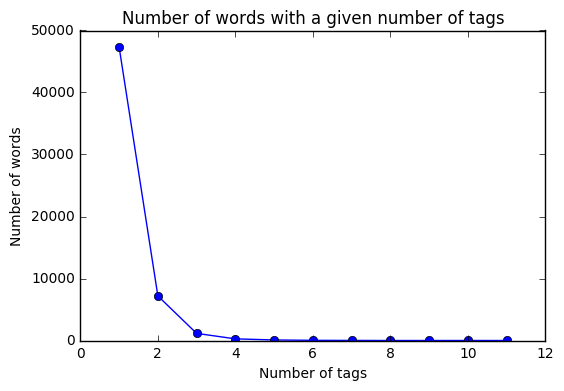

In [6]:
import nltk
from nltk.corpus import brown
import pylab

cfd = nltk.ConditionalFreqDist(brown.tagged_words())
size2words = nltk.Index((len(tags), word) for (word, tags) in cfd.items())
sizes = pylab.arange(1, 12)

pylab.plot(sizes, [len(size2words[size]) for size in sizes], '-bo')
pylab.title('Number of words with a given number of tags')
pylab.xlabel('Number of tags')
pylab.ylabel('Number of words')
pylab.show()

2. Stratified Test/Train Sets
'train' and 'test' are dictionaries of category: tagged_sents. This was done inorder to simplify follwing tasks. 

In [8]:
import nltk
from functools import reduce
from nltk.corpus import brown 

def category_split(sents, ratio):
    size = int(len(sents) * ratio)
    return sents[:size], sents[size:]

def stratified_split(corpus, ratio=0.9):
    train = {}
    test = {}
    for cat in corpus.categories():
        cat_train_test = category_split(corpus.tagged_sents(categories=cat), ratio)
        train[cat] = cat_train_test[0]
        test[cat] = cat_train_test[1]
    return train, test

In [8]:
train, test = stratified_split(brown)

3.1.1 Class SimpleUnigramTagger

In [17]:
import nltk
from collections import defaultdict
class SimpleUnigramTagger(nltk.TaggerI):
    def __init__(self, train):
        self._train(train)
        
    def _train(self, tagged_corpus):
        tagged_words = [tagged_word for sent in tagged_corpus for tagged_word in sent]
        cfd = nltk.ConditionalFreqDist(tagged_words)
        self._likely_tags = defaultdict(lambda: 'NONE')
        for word in cfd:
            self._likely_tags[word] = cfd[word].max()
        
    def tag(self, tokens):
        return [(word, self._likely_tags[word]) for word in tokens]
    
    def tag_one(self, word):
        return word, self._likely_tags[word]


3. Unigram

3.1.2 SimpleUnigramTagger and nltk.UnigramTagger evalution comparison

In [18]:
clean_train = [sent for sents in train.values() for sent in sents]
clean_test = [sent for sents in test.values() for sent in sents]
tagger = SimpleUnigramTagger(train=clean_train)
nltk_tagger = nltk.UnigramTagger(train=clean_train)

print("SimpleUnigramTagger evaluation: \n{0}\n".format(tagger.evaluate(clean_test)))
print("nltk.UnigramTagger evaluation: \n{0}".format(nltk_tagger.evaluate(clean_test)))

SimpleUnigramTagger evaluation: 
0.8815246419033747

nltk.UnigramTagger evaluation: 
0.8815246419033747


3.1.3 Known and unknown words

In [19]:
def remove_tags(sent):
    return [word for (word, _) in sent]
tagged_test = [tagger.tag(remove_tags(sent)) for sent in clean_test]
test_size = sum([1 for sent in clean_test for word in sent])
unk_num = sum([1 for sent in tagged_test for (_, tag) in sent if tag == "NONE"])
known_num = 0
for i in range(len(clean_test)):
    for j in range(len(clean_test[i])):
        if (tagged_test[i][j][1] != "NONE") and (tagged_test[i][j][1] != clean_test[i][j][1]):
            known_num += 1
print("Error due to unknown words: {0}.".format(unk_num/test_size))
print("Error due to known words: {0}.".format(known_num/test_size))

Error due to unknown words: 0.040594051117194496.
Error due to known words: 0.0778813069794309.


3.1.4 Rate of unknown words per category

In [20]:
for cat in test.keys():
    tagged_words = tagger.tag([word for sent in test[cat] for (word, _) in sent])
    print("{0}: {1} unkown words.".format(cat, sum([1 for (_, tag) in tagged_words if tag == "NONE"])))

adventure: 364 unkown words.
hobbies: 435 unkown words.
government: 233 unkown words.
editorial: 244 unkown words.
learned: 943 unkown words.
science_fiction: 26 unkown words.
mystery: 146 unkown words.
reviews: 219 unkown words.
lore: 393 unkown words.
romance: 191 unkown words.
religion: 70 unkown words.
humor: 172 unkown words.
fiction: 228 unkown words.
news: 392 unkown words.
belles_lettres: 793 unkown words.


3.2 Using Entropy to Filter Affix Tagger

In [21]:
from math import log

# length of suffix to map suffix->tag
suffix_length = -2

# get token's suffix 
def get_context(token):
    return token[suffix_length:]

def entropy(tag_fd):
    total_occ = sum([occ for (_, occ) in tag_fd])
    res = 0
    for (_, occ) in tag_fd:
        p = occ / total_occ
        res -= p * log(p, 2)
    return res

def aff_train(tagged_corpus, cutoff=0):
    
    # Count how many times each tag occurs in each context.
    fd = nltk.ConditionalFreqDist()
    for sentence in tagged_corpus:
        for (token, tag) in sentence:
            context = get_context(token)
            fd[context][tag] += 1
    
    context_to_tag = dict((word, fd[word].max()) for word in fd if entropy(fd[word].items()) < cutoff)
    return context_to_tag
    
    

Dividing the train set to train and developement:

In [22]:
ratio = 0.9
opt_train = []
opt_dev = []
for sents in train.values():
    train_size = int(ratio * len(sents))
    opt_train += sents[:train_size]
    opt_dev += sents[train_size:]

Choosing cutoff's range

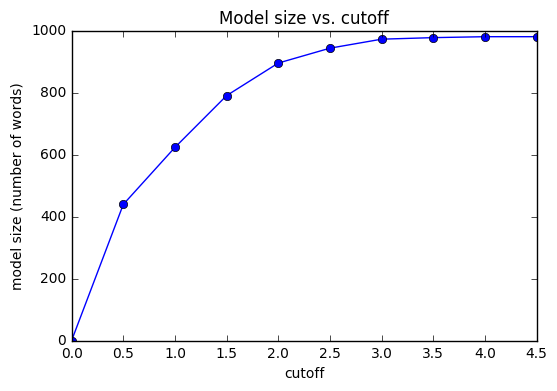

In [23]:
import pylab
from numpy import arange
cutoffs = arange(0, 5, 0.5)
pylab.plot(cutoffs, [len(aff_train(clean_train, cutoff)) for cutoff in cutoffs], '-bo')
pylab.title('Model size vs. cutoff')
pylab.xlabel('cutoff')
pylab.ylabel('model size (number of words)')
pylab.show()

Affix tagging functions

In [24]:
counter = 0
def aff_tag_one(token, context, backoff):
    if token in context:
        return token, context[get_context(token)]
        
    else:
        return backoff.tag_one(token)

def aff_tag(tokens, context, backoff):
    return [aff_tag_one(token, context, backoff) for token in tokens]

Optimizing cutoff value using opt_train and opt_dev

In [25]:
backoff = SimpleUnigramTagger(opt_train)
opt_dev_clean = [word for sent in opt_dev for word in sent]
size = len(opt_dev_clean)
def opt_cutoff(cutoff):
    context_to_tag = aff_train(opt_train, cutoff)
    tagged = aff_tag(remove_tags(opt_dev_clean), context_to_tag, backoff)
    error = 0
    for i in range(len(opt_dev_clean)):
        if tagged[i][1] != opt_dev_clean[i][1]:
            error += 1
    return error / size

In [26]:
cutoffs = arange(0, 2, 0.1)
errors = [opt_cutoff(cutoff) for cutoff in cutoffs]

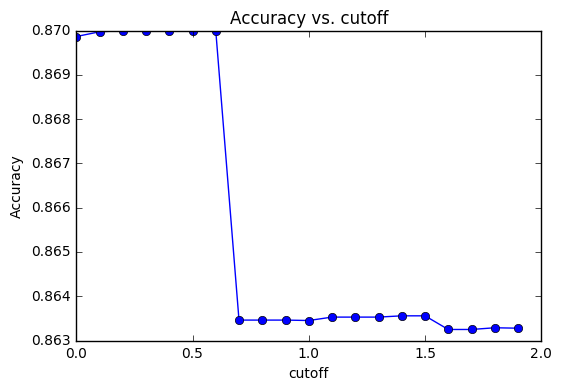

Best cutoff: 0.2 with an accuracy of: 0.8699989408105688


In [27]:
pylab.plot(cutoffs, [1-error for error in errors], '-bo')
pylab.title('Accuracy vs. cutoff')
pylab.xlabel('cutoff')
pylab.ylabel('Accuracy')
pylab.show()
print("Best cutoff: {0} with an accuracy of: {1}".format(cutoffs[errors.index(min(errors))], 1-min(errors)))

Comparing the models

In [28]:
unigram = SimpleUnigramTagger(train=clean_train)
print("SimpleUnigramTagger evaluation: \n{0}\n".format(unigram.evaluate(clean_test)))
context_to_tag = aff_train(clean_train, 0.2)
test_tagged_words = [tagged_word for sent in clean_test for tagged_word in sent]
tagged = aff_tag(remove_tags(test_tagged_words), context_to_tag, unigram)
error = 0
for i in range(len(test_tagged_words)):
    if tagged[i][1] != test_tagged_words[i][1]:
        error += 1
error = error / len(test_tagged_words)
print("Affix with entropy evaluation: \n{0}\n".format(1-error))

SimpleUnigramTagger evaluation: 
0.8815246419033747

Affix with entropy evaluation: 
0.8815497568040451



Extracting good suffixes

In [29]:
print(",".join(context_to_tag.keys()))

5%,rv,6',qw,uc,pH,-e,'',2',',OV,gd,HA,b-,yt,Ye,We,UC,UF,2s,3d,.0,6-,mg,Cr,z',sz,CH,RL,Q3,/,xi,u.,VA,k.,BO,,,iH,aj,0%,!,``,jK,V.,o-,zg,/g,c),I.,k',f,Ax,--,ES,03,mc,VC,dw,MM,'a,SF,2%,zq,ih,C',Ku,Us,y,bn,IB,hE,DC,cu,NC,US,0,73,At,C.,gr,NS,HC,'y,If,kt,FN,SO,ja,He,zt,-r,GE,dl,.',jA,CU,YJ,7A,IU,NW,Am,GS,T.,l,-m,GM,J.,wy,RF,59,az,PA,sn,9),$4,?',I,LH,MF,2H,/9,Se,$7,o,Wu,c',*b,LA,yg,Or,N',IN,-T,DU,It,OW,3M,-p,Ti,Ed,PQ,kh,/7,1b,MA,EA,WA,$9,;,-I,Po,ho,VP,bl,NP,EG,XG,l/,t},-9,lh,Ai,Jo,93,-c,AN,ez,tm,SN,G.,pd,YM,$8,5o,41,A5,yb,wo,0A,Si,-P,EP,4',aq,jB,a,yy,cm,SM,/8,d-,FM,PH,'k,4%,SR,DR,g-,MU,md,Eq,79,DW,-F,Io,gm,OM,Oh,x,Pm,MS,SD,if,wh,rz,9b,0s,2C,TC,t-,uz,TH,/l,6),CB,sl,-E,By,+,8%,Fe,IO,Cs,/4,OH,t,58,fu,BE,i,BW,pm,Da,-d,4C,SU,9%,sw,uu,54,w,IQ,nq,F.,EC,j),H6,vp,h,CO,IS,UK,b/,a),c-,QU,'m,$3,hf,9N,.,RB,0-,4),MT,yc,XF,H.,5-,M,6A,-8,1),mV,1a,oz,w-,Um,PW,SE,ID,/2,AS,wr,vt,wi,6a,y-,rh,Ad,rx,T},1M,fo,tl,-0,BI,VE,KK,hd,b,FA,PR,/c,64,6%,0Y,3%,NT,3A,e,JA,IC,nz,4-,cz,ml,1%,uf,LN,Q.,96,7b,g,En,vi,8e,Af,j.,D',In,

### Discussion:

1. Does entropy filtering improve the accuracy of the AffixTagger?
As seen above, entropy filtering did not improve the unigram tagger's accuracy. Tests were done on suffixes of length 3 and 2. Only 2-long suffixes improved accuracy by a negligent sum.

2. How do you determine the range of values to test for the cutoff?
As seen in the graph above, the range which affected the context size was chosen as the tested cutoff range. At the beginning, the range was 0..3.5, but it was then reduced to 0..2 since the error was monotonously rising after roughly cutoff=6.

3. Is the accuracy value evolving in a predictable manner as the cutoff varies?
As the cutoff increases, accuracy reduces. As the cutoff increases, the model allows more suffix tagging, and relies less on the unigram tagger. In this particular case, the unigram tagging seems preferable to suffix tagging, and thus the trend makes sense. Perhaps on a larger database, suffix tagging would have shown better results. 

4. Describe the list of suffixes that are good tag predictors -- are you surprised by what you observe?
Many 2-letter words (or 2-letter initials) were chosen as good predictors, such as: 'pH', 'FM', 'AM', 'UK', 'Fe'. Suffixes like 'ed, 'es', 'ng', were not included. That means that at least on this corpus, the more general suffixes are rather ambigous. 

### 4. Fine-Grained Accuracy and Error Analysis

### 4.1 Per Tag Precision and Recall

Generate train/test (same as 3)

In [35]:
import nltk
from functools import reduce
from nltk.corpus import brown 

def category_split(sents, ratio):
    size = int(len(sents) * ratio)
    return sents[:size], sents[size:]

def split(corpus, ratio=0.9):
    train = []
    test = []
    for cat in corpus.categories():
        cat_train_test = category_split(corpus.tagged_sents(categories=cat,tagset='universal'), ratio)
        #train = train+cat_train_test[0]
        train.extend(cat_train_test[0])
        test.extend(cat_train_test[1])
        
    return train, test

Microevaluate: evaluate tagger based on test corpus. Returns and object Eval  

In [36]:
from collections import defaultdict, Counter


class Eval:
   
   def __init__(self):
     x = 0
      
   def setTP(self,tp):
     self.tp = tp
   
   def setFP(self,fp):
     self.fp = fp
   
   def setRecall(self,recall):
     self.recall = recall
    
   def setFN(self,fn):
     self.fn = fn
        
   def setPrecision(self,precision):
     self.precision = precision
    
   def setF_Measure(self,fMeasure):
     self.f_Measure = fMeasure
        
   def getTP(self):
     return self.tp
   
   def getFP(self):
     return self.fp
   
   def getRecall(self):
     return self.recall 
    
   def getFN(self):
     return self.fn 
        
   def getPrecision(self):
     return self.precision 
    
   def getF_Measure(self):
     return self.f_Measure 

   def displayeEval(self):
      print ("Name : ",str(self.x))



    
def microEvaluate(self,testCorpus):
# this function returns TP, FP, FN, Recall, Precision, F_Measure for a tagger based on testCorpus
# call this function: eval = microEvaluate(testCorpus)
# to access each measure use eval.getTP(). This returns a dictionary of tag:value

    gold_tags = []
    for sent in testCorpus: 
        for tuple in sent:
          gold_tags.append(tuple[1])
          #gold_tags.append(tuple)
    
    sentt = []
    for sent in testCorpus:
        text = []
        for tuple in sent:
            text.append(str(tuple[0]))
        sentt.append(text)   
          

    res = []
    for sent in sentt:
        #tmp = tagger.tag(nltk.word_tokenize(sent))
        tmp = self.tag(sent)                
        for ttmp in tmp:
            #res.append(ttmp)
            res.append(ttmp[1])

    TPtags = defaultdict(int)
    FPtags = defaultdict(int)
    FNtags = defaultdict(int)

    #print(res[0])
    #FNtags['DET']+=1

    #leng = len(gold_tags)
    #print(leng)
    lenr = len(res)
    #print(lenr)
    for i in range(0,lenr):
        if (res[i]!=gold_tags[i]):
            FPtags[res[i]] +=1
            FNtags[gold_tags[i]] += 1
        else:
            TPtags[gold_tags[i]] += 1

    alldict =  [FNtags, TPtags, FPtags]
    allkey = set().union(*alldict)


    Precision = defaultdict(int)
    Recall = defaultdict(int)
    F_Measure = defaultdict(int)

    for key in allkey:
        if (not (key in FPtags)):
            FPtags[key]=0
        if (not(key in FNtags)):
            FNtags[key]=0
        if (not(key in TPtags)):
            TPtags[key]=0

    for key in allkey:
        if ((TPtags[key]>0)|(FPtags[key]>0)):
            Precision[key] = TPtags[key]/(TPtags[key]+FPtags[key])
        else:
            Precision[key] = 2
        if ((TPtags[key]>0)|(FNtags[key]>0)):
            Recall[key] = TPtags[key]/(TPtags[key]+FNtags[key])
        else:
            Recall[key] = 2

        if ((Recall[key]==2)|(Precision[key]==2)):
            F_Measure[key] = 2
        else:
            if ((Recall[key]==0)&(Precision[key]==0)):
                F_Measure[key] = 2
            else:
                F_Measure[key]= 2*Recall[key]*Precision[key]/(Recall[key]+Precision[key])
                
    final = Eval()
    final.setTP(TPtags)
    final.setFP(FPtags)
    final.setFN(FNtags)
    final.setRecall(Precision)
    final.setPrecision(Recall)
    final.setF_Measure(F_Measure)

    return final

nltk.TaggerI.microEvaluate = microEvaluate
     

confusionMatrix() return a confusion matrix for a given tagger using a test corpus. plot_confusion_matrix - plots a confusion matrix with the following labels order: labels = ['ADJ','ADP','ADV','CONJ','DET','NOUN','NUM','PRT','PRON','VERB','.','X']

In [37]:
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

def confusionMatrix(self,testCorpus):
    
    gold_tags = []
    for sent in testCorpus: 
        for tuple in sent:
          gold_tags.append(tuple[1])
          #gold_tags.append(tuple)
    
    sentt = []
    for sent in testCorpus:
        text = []
        for tuple in sent:
            text.append(str(tuple[0]))
        sentt.append(text)   
          

    res = []
    for sent in sentt:
        #tmp = tagger.tag(nltk.word_tokenize(sent))
        tmp = self.tag(sent)                
        for ttmp in tmp:
            #res.append(ttmp)
            res.append(ttmp[1])
            
    labels = ['ADJ','ADP','ADV','CONJ','DET','NOUN','NUM','PRT','PRON','VERB','.','X']
            
    cm = metrics.confusion_matrix(gold_tags, res,labels)
    #print(cm)
    return cm

nltk.TaggerI.confusionMatrix = confusionMatrix

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #plt.close('all')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Call MicroEvaluate to evaluate the tagger using the brown test set comparing to gold tagging. 

In [38]:
train, test = split(brown)

tags = []
for sent in train:
    for token in sent:
        tags.append(token[1])
maxTag = nltk.FreqDist(tags).max()
default_tagger = nltk.DefaultTagger(maxTag)

tagger0 = nltk.NgramTagger(1, train,backoff = default_tagger)

taggerR = nltk.RegexpTagger(
    [(r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),   # cardinal numbers
     (r'(The|the|A|a|An|an)$', 'DET'),   # articles
     (r'.*able$', 'ADJ'),                # adjectives
     (r'.*ness$', 'NOUN'),                # nouns formed from adjectives  
     (r'.*ly$', 'ADV'),                  # adverbs
     (r'.*s$', 'NOUN'),                  # plural nouns  
     (r'.*ing$', 'VERB'),                # gerunds   
     (r'.*ed$', 'VERB')                 # past tense verbs
    # (r'.*', 'NOUN')                      # nouns (default)
    ],backoff = tagger0)

tagger2 = nltk.NgramTagger(2, train, backoff=taggerR)
tagger3 = nltk.NgramTagger(3, train, backoff=tagger2)

#for n in range(2,5):  # start at unigrams (1) up to and including trigrams (3)
#    tagger = nltk.NgramTagger(n, train, backoff=tagger)
    

In [39]:
eval = tagger3.microEvaluate(test)

recall = eval.getRecall()

print(recall)

defaultdict(<class 'int'>, {'ADP': 0.9322870865182981, '.': 0.9986318326926835, 'PRT': 0.7340856481481481, 'VERB': 0.9573909315039125, 'ADJ': 0.9309864505508421, 'DET': 0.9915266408157404, 'NOUN': 0.9361188549670225, 'X': 0.7380952380952381, 'ADV': 0.9310283052669294, 'CONJ': 0.992496248124062, 'PRON': 0.9743910056214866, 'NUM': 0.9701879455605963})


Calculate confusion matrix for default tagger

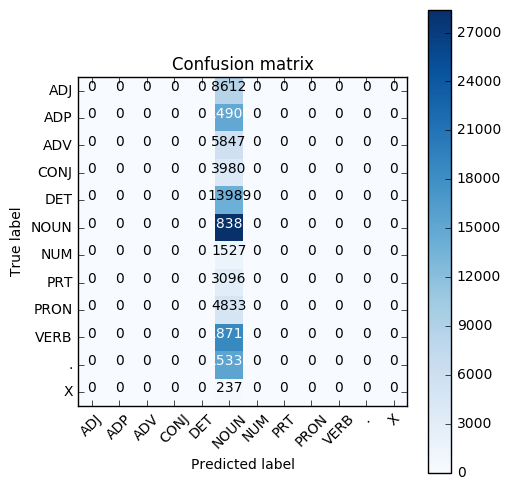

In [40]:
cm = default_tagger.confusionMatrix(test)
labels = ['ADJ','ADP','ADV','CONJ','DET','NOUN','NUM','PRT','PRON','VERB','.','X']
#print(cm)

# Plot confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, classes=labels, title='Confusion matrix')
plt.show()

Calculate confusion matrix for the best classifier discussed in class (combined)

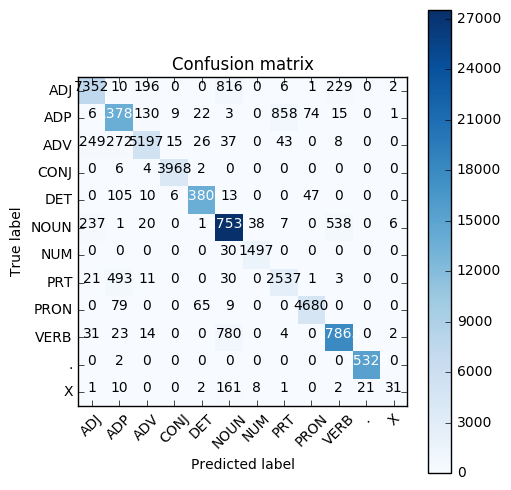

In [41]:
cm = tagger3.confusionMatrix(test)
#print(cm)
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, classes=labels, title='Confusion matrix')
plt.show()

In [42]:
#to be depricated

train, test = split(brown)
#clean_train = [sents for sents in train]
#clean_test = [sents for sents in test]

#print(type(train))
#print(train[:3])
#print(type(clean_train))
#print(clean_train[:3])
#.values())  

gold_tags = []
for sent in test: 
    for tuple in sent:
          #gold_tags.append(tuple[1])
          gold_tags.append(tuple)
       

#tagger = SimpleUnigramTagger(train=train)
tagger = nltk.RegexpTagger(
    [(r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),   # cardinal numbers
     (r'(The|the|A|a|An|an)$', 'DET'),   # articles
     (r'.*able$', 'ADJ'),                # adjectives
     (r'.*ness$', 'NOUN'),                # nouns formed from adjectives  
     (r'.*ly$', 'ADV'),                  # adverbs
     (r'.*s$', 'NOUN'),                  # plural nouns  
     (r'.*ing$', 'VERB'),                # gerunds   
     (r'.*ed$', 'VERB'),                 # past tense verbs
     (r'.*', 'NOUN')                      # nouns (default)
    ])

for n in range(1,3):  # start at unigrams (1) up to and including trigrams (3)
    tagger = nltk.NgramTagger(n, train, backoff=tagger)
    
clean_test = []

sentt = []
for sent in test:
    text = []
    for tuple in sent:
        text.append(str(tuple[0]))
    #tmps = " ".join(str(x) for x in text)
    #tmps = convertToString(tmp," ")
    #sentt.append(tmps)
    sentt.append(text)
    
#print(type(sentt))
#print(sentt[:3])       

res = []
for sent in sentt:
    #tmp = tagger.tag(nltk.word_tokenize(sent))
    tmp = tagger.tag(sent)                
    for ttmp in tmp:
        res.append(ttmp)
        #res.append(ttmp[1])
    
#print(type(res))
#print(res[:20])
#print(type(gold_tags))
#print(gold_tags[:20])
#test_tags = [tag for sent in clean_test
#    for (word, tag) in tagger.tag(sent)]



#print(nltk.ConfusionMatrix(gold_tags, test_tags))

Calculate TP, FP, FN, Precision, Recall and F-Measure

In [176]:
#to be depricated
from collections import defaultdict, Counter

TPtags = defaultdict(int)
FPtags = defaultdict(int)
FNtags = defaultdict(int)

#print(res[0])
#FNtags['DET']+=1

#leng = len(gold_tags)
#print(leng)
#lenr = len(res)
#print(lenr)
for i in range(0,lenr):
    if (res[i]!=gold_tags[i]):
        FPtags[res[i]] +=1
        FNtags[gold_tags[i]] += 1
    else:
        TPtags[gold_tags[i]] += 1
        
alldict =  [FNtags, TPtags, FPtags]
allkey = set().union(*alldict)


Precision = defaultdict(int)
Recall = defaultdict(int)
F_Measure = defaultdict(int)

for key in allkey:
    if (not (key in FPtags)):
        FPtags[key]=0
    if (not(key in FNtags)):
        FNtags[key]=0
    if (not(key in TPtags)):
        TPtags[key]=0
        
for key in allkey:
    if ((TPtags[key]>0)|(FPtags[key]>0)):
        Precision[key] = TPtags[key]/(TPtags[key]+FPtags[key])
    else:
        Precision[key] = 2
    if ((TPtags[key]>0)|(FNtags[key]>0)):
        Recall[key] = TPtags[key]/(TPtags[key]+FNtags[key])
    else:
        Recall[key] = 2
        
    if ((Recall[key]==2)|(Precision[key]==2)):
        F_Measure[key] = 2
    else:
        if ((Recall[key]==0)&(Precision[key]==0)):
            F_Measure[key] = 2
        else:
            F_Measure[key]= 2*Recall[key]*Precision[key]/(Recall[key]+Precision[key])
        

#print(FPtags)
#print(FNtags)
#print(TPtags)

In [177]:
#to be depricated
if (test == 1):
    RecallS = sorted(Recall, key=Recall.get)
    PrecisionS = sorted(Precision, key=Precision.get)
    F_MeasureS = sorted(F_Measure, key=F_Measure.get)

    print("Recall lowest universal tags "+str(RecallS[0])+" "+str(Recall[RecallS[0]])+" "+str(RecallS[1])+" "+str(Recall[RecallS[1]])+" "+str(RecallS[2])+" "+str(Recall[RecallS[2]]))
    print("Precision lowest universal tags "+str(PrecisionS[0])+" "+str(Precision[PrecisionS[0]])+" "+str(PrecisionS[1])+" "+str(Precision[PrecisionS[1]])+" "+str(PrecisionS[2])+" "+str(Precision[PrecisionS[2]]))
    print("F-Measure lowest universal tags "+str(F_MeasureS[0])+" "+str(F_Measure[F_MeasureS[0]])+" "+str(F_MeasureS[1])+" "+str(F_Measure[F_MeasureS[1]])+" "+str(F_MeasureS[2])+" "+str(F_Measure[F_MeasureS[2]]))


Recall lowest universal tags X 0.1518987341772152 ADJ 0.8637947050627032 ADV 0.8960150504532238
Precision lowest universal tags PRT 0.6907829534192269 X 0.75 ADV 0.9338680926916221
F-Measure lowest universal tags X 0.25263157894736843 PRT 0.7818283791362871 ADJ 0.8981587684877753


In [186]:
if (test == 1):
    lenr = len(res)
    for i in range(0,lenr):
        if (res[i]!=gold_tags[i]):
            print(res[i-3][0]+","+res[i-2][0]+","+res[i-1][0]+","+res[i][0]+","+res[i][1]+","+res[i+1][0]+","+res[i+2][0]+","+res[i+3][0])
            print(gold_tags[i-2][0]+","+gold_tags[i-1][0]+","+gold_tags[i][0]+","+gold_tags[i][1]+","+gold_tags[i+1][0]+","+gold_tags[i+2][0])
            print("##################")


overwhelming,temptation,to,flng,NOUN,himself,out,of
temptation,to,flng,VERB,himself,out
##################
to,flng,himself,out,PRT,of,that,bristling
flng,himself,out,ADP,of,that
##################
He,strolled,back,to,PRT,the,door,,
strolled,back,to,ADP,the,door
##################
with,his,deputy,to,PRT,the,ranch,he
his,deputy,to,ADP,the,ranch
##################
Leisurely,he,climbed,on,ADP,to,the,wagon
he,climbed,on,PRT,to,the
##################
to,the,wagon,next,ADJ,to,Neal,Brown
the,wagon,next,ADP,to,Neal
##################
the,wagon,next,to,PRT,Neal,Brown,.
wagon,next,to,ADP,Neal,Brown
##################
``,Just,get,out,PRT,of,here,without
Just,get,out,ADP,of,here
##################
.,But,the,fighting,NOUN,marshal's,fifty-year,run
But,the,fighting,VERB,marshal's,fifty-year
##################
the,fighting,marshal's,fifty-year,NOUN,run,of,immunity
fighting,marshal's,fifty-year,ADJ,run,of
##################
violent,death,came,to,PRT,a,full,and
death,came,to,ADP,a,full
##################

Discussion

Q: Which tags are most difficult in the universal tagset? Explain why with linguistic examples.

A: 
As presented by the image below (test results on the brown corpus) the X (other) and PART (particle) tags are more difficult to tag.  

<img src="files/image.png">

The reason X is difficult to tag is that it has no specific morophological, syntactic or semantic clues and it is relatively rare in the language. ADP tokens are many times tagged as PART since the N-gram tagger takes into account the N words before the word itself, where the PART or ADP tagging depends on the words after the tagged words. This is illustrated in the wrong tagging examples below (the first line is the tagger results, and the second one is the brown tagged corpus)

<img src="files/PART.png">

Q: Validate the ConfusionMatrix() method over the DefaultTagger discussed in class (what shape do you expect for the confusion matrix of a DefaultTagger?).

A: For the default tagger the predicted tag is always NOUN which is the most popular tag as expected 

<img src="files/defTagger.png">

Q: Report the confusion matrix for the universal tagset of the Brown corpus for the best tagger discussed in class. Discuss the results: which pairs of tags are the most difficult to distinguish? Show examples of the 4 most frequent confusion pairs and explain why they are difficult to distinguish.

A: The most difficult pairs of tags are: ADJ and VERB are often tagged as NOUN because nown was defined as the default tagger. ADP is often tagged as PRT and vice versa for the same reason explained in the previous question

<img src="files/bestTagger.png">

### 5 Averaged Perceptron

5.1.
The Averaged Perceptron algorithm is an online classification algorithm. The term online means that the algorithm updates its weights according to new examples, unlike our UnigramTagger, which uses the train set as a whole to train. 
- Training:
For each new train example, the model verifies the scalar product of its weights vector and the example multiplied by the example's tag is positive (which means the scalar product and the tag are of the same sign). If it is so, it updates nothing. If not, the weights are updated so that the new scalar product time the tag is higher than the previous one.  
- Testing/Tagging:
Each test example is tagged accoring to the sign of the scalar product of the model's weights vector and the example.

5.2 Measuring nltk.PerceptronTagger's performance

In [24]:
train, test = stratified_split(brown)
clean_train = [sent for sents in train.values() for sent in sents]
clean_test = [sent for sents in test.values() for sent in sents]

In [25]:
perc_tagger = nltk.PerceptronTagger(load=False)


In [28]:
perc_tagger.train(sentences=clean_train, save_loc="perc.pickle", nr_iter=5)
# or load our pre-trained model
# perc_tagger.load('perc.pickle')

In [ ]:
test_untagged_words = [word for sent in clean_test for (word, tag) in sent]
test_tagged_words = perc_tagger.tag(test_untagged_words)

In [27]:
perc_tagger.evaluate(clean_test)

0.956819114113737

5.4
1. The tagdict is a word->tag-distribtution dictionary, and it is used very much like in the case of the UnigramTagger. The main difference is that it is only used with non-rare non ambigous words. Namely, words which appear more than 20 times in the train set and are tagged to a specific tag more than 97% of their occurences. 
5. The method normalize(self, word) receives a word as input, and classifies it to one of the following categories: hyphen, year, digits or word. In the case of the first 3 categories, the tagger aims to treat all words of the same category equally (i.e. the two words "1984" and "1949" should be considered the same, for POS tagging purposes). Without this method, the words "32" will be considered unkown even after observing other numbers, such as "56", "34645", "4566254" and "1". If the word does not fit one of the first 3 categories, the method returns the word itself (in lower case), to be tagged normally. 

In [18]:
import nltk
import pickle
def load_tagger(file):
    tagger = nltk.PerceptronTagger(load=False)
    with open('perc.pkl', 'rb') as f:
        model = pickle.load(f)
        tagger.model.weights, tagger.tag_dict, tagger.classes = model
        tagger.model.classes = model[2]
    return tagger


In [6]:
def get_features(perceptronTagger, taggedSentence):
    tokens = [word for word, tag in taggedSentence]
    prev, prev2 = perceptronTagger.START
    output = []
        
    context = perceptronTagger.START + [perceptronTagger.normalize(w) for w in tokens] + perceptronTagger.END
    for i, word in enumerate(tokens):
        features = perceptronTagger._get_features(i, word, context, prev, prev2)
        print("Word: {0}\nFeatures: {1}".format(word, ", ".join(features.keys())))
        rev2 = prev
        prev = tag

    return output